In [1]:
import numpy as np
import pylab as plt
import netCDF4 as nc
import os

In [2]:
#Loop over the columns 
N = 4
column_data = []
for n in range(N):
    path = './couple_' + str(n)
    path = os.path.join(path, 'rico')
    path = os.path.join(path, 'stats.nc')
    column_data.append(nc.Dataset(path, 'r'))

32.21447811174994
32.13863423933085
32.136124089167105
32.177751909514214


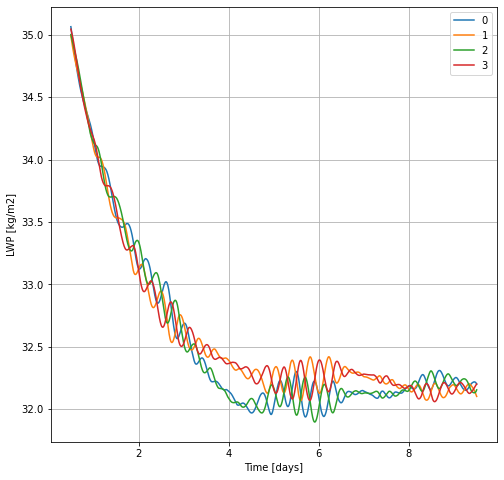

In [12]:
var = 'lWP'
#plt.figure()
lwp_mean = []
data_pack = []
plt.figure(figsize=(8,8))
Nt = 60 *24*1
for n in range(N):
    #plt.subplot(4,1,n+1)
    micro = column_data[n]['MicroBase']
    data = micro['timeseries']['LWP'][:]  +  micro['timeseries']['VWP'][:] +  micro['timeseries']['RWP'][:]
    lwp_mean.append(np.mean(data[-24*60*5:]))
    data = np.convolve(data, np.ones(Nt)/Nt, mode='valid')
    time = micro['timeseries']['time'][:]
    time = np.convolve(time, np.ones(Nt)/Nt, mode='valid')
    plt.plot(time/86400,data,label=str(n))
    data_pack.append(data)
    plt.xlabel('Time [days]')
    plt.ylabel('LWP [kg/m2]')
    print(np.mean(data[-60*2:]))

plt.legend()
plt.grid()
plt.savefig('qc.png')
    #plt.ylim(0.0, 0.41)

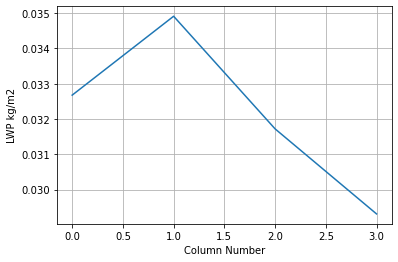

In [4]:
plt.figure()
plt.ylabel('LWP kg/m2')
plt.xlabel('Column Number')
plt.plot(lwp_mean)
plt.grid()
plt.savefig('lwp.png')

In [5]:
def convert_to_array(data_pack):
    
    min_len = 0
    for d in data_pack:
        min_len = np.maximum(len(d), min_len)
    
    
    #Now stack the array
    array = None
    for d in data_pack:

        if array is None:
            array = d
        else:
            array = np.vstack((array[:min_len],d))
    
    print(np.shape(array))    
    return



#print(data_pack)
#convert_to_array(data_pack)

0.16079491295989892
-0.7298751787641408
0.609419461126158
-0.3153276053563086


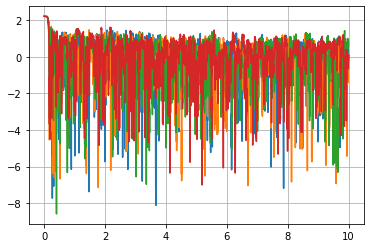

In [6]:
grp = 'VelocityState'
var = 'u_min'
#plt.figure()
data_pack = []
for n in range(N):
    micro = column_data[n][grp]
    data = micro['timeseries'][var][:]
    time = micro['timeseries']['time'][:]
    plt.plot(time/86400,data)
    data_pack.append(data)
    
    print(np.mean(data[-60:]))
    
plt.grid()

5.383142584645518
5.382021917848444
5.384387288719218
5.3876842333524


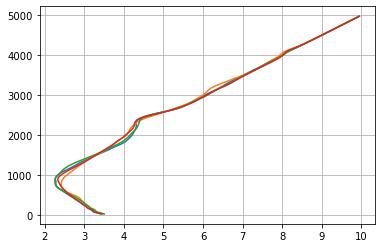

In [7]:
grp = 'VelocityState'
var = 'u'
#plt.figure()
data_pack = []
for n in range(N):
    micro = column_data[n][grp]
    data = np.mean(micro['profiles'][var][-60:,:], axis=0)
    z = micro['profiles']['z'][:]
    plt.plot(data, z)
    data_pack.append(data)
    
    print(np.mean(data[-360:]))
    
plt.grid()
plt.savefig('u.png')

6.441947815662364e-06
6.890044499951946e-06
6.218516861688714e-06
5.7468564594868116e-06


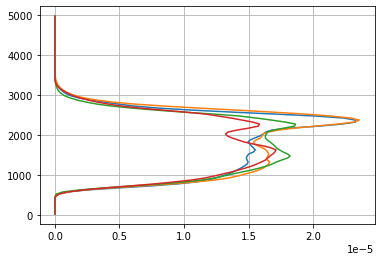

In [8]:
grp = 'ScalarState'
var = 'qc'
#plt.figure()
data_pack = []
for n in range(N):
    micro = column_data[n][grp]
    data = np.mean(micro['profiles'][var][- 5 * 24 * 60:,:], axis=0) 
    z = micro['profiles']['z'][:]
    plt.plot(data, z)
    data_pack.append(data)
    
    print(np.mean(data[-5 * 24 * 60:]))
    
plt.grid()
plt.savefig('qc2.png')

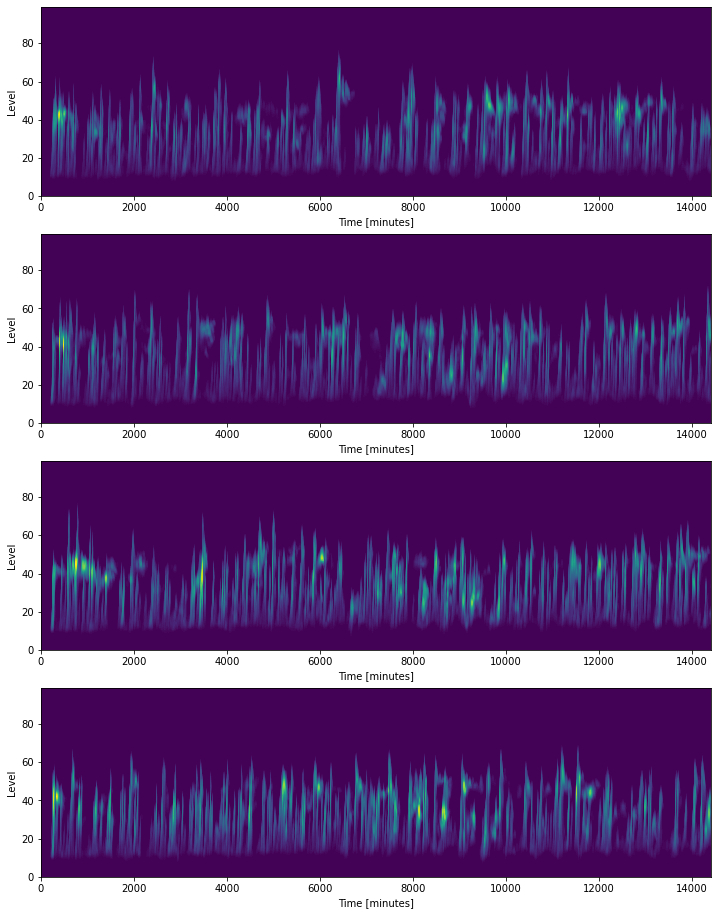

In [9]:
grp = 'ScalarState'
var = 'qc'
plt.figure(figsize=(12,16))
for n in range(N):
    plt.subplot(4,1,n+1)
    micro = column_data[n][grp]
    data = micro['profiles'][var][:,:]
    #z = micro['profiles']['z'][:]
    plt.contourf(data.T, 100)
    plt.xlabel('Time [minutes]')
    plt.ylabel('Level')
plt.savefig('qc_cross.png')


    

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): 
    variables(dimensions): 
    groups: couple_0, couple_1, couple_2, couple_3
<class 'netCDF4._netCDF4.Group'>
group /couple_0:
    dimensions(sizes): z(100), t(1440)
    variables(dimensions): float64 z(z), float64 t(t), float64 qv_ss_forcing(t,z), float64 qv_ls_forcing(t,z), float64 qv_ls_state(t,z), float64 s_ss_forcing(t,z), float64 s_ls_forcing(t,z), float64 s_ls_state(t,z)
    groups: 
720
<class 'netCDF4._netCDF4.Group'>
group /couple_1:
    dimensions(sizes): z(100), t(1440)
    variables(dimensions): float64 z(z), float64 t(t), float64 qv_ss_forcing(t,z), float64 qv_ls_forcing(t,z), float64 qv_ls_state(t,z), float64 s_ss_forcing(t,z), float64 s_ls_forcing(t,z), float64 s_ls_state(t,z)
    groups: 
720
<class 'netCDF4._netCDF4.Group'>
group /couple_2:
    dimensions(sizes): z(100), t(1440)
    variables(dimensions): float64 z(z), float64 t(t), float64 qv_ss_forcing(t,z

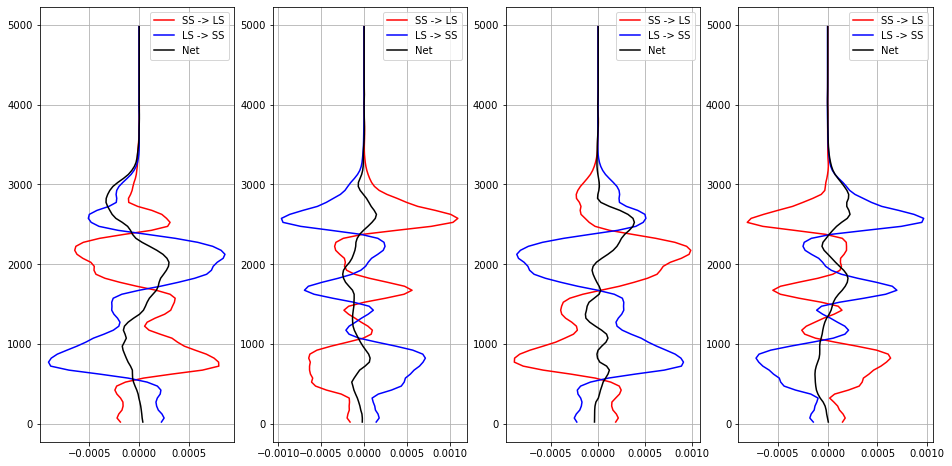

In [10]:
couple_grp = nc.Dataset('couple_out.nc', 'r')
print(couple_grp)



plt.figure(figsize=(16,8))
count = 1

for c in couple_grp.groups:
    plt.subplot(1,4,count)
    grp_n = couple_grp[c]
    
    print(grp_n)

    n = int(len(grp_n['t'][:])/2)
    print(n)
    
    qv_ss_forcing = np.mean(grp_n['qv_ss_forcing'][-n:,:], axis=0)
    qv_ls_forcing = np.mean(grp_n['qv_ls_forcing'][-n:,:], axis=0)
    
    z = grp_n['z'][:]
    
    plt.plot(qv_ss_forcing * 86400, z, '-r', label = 'SS -> LS')
    plt.plot(qv_ls_forcing * 86400, z, '-b', label = 'LS -> SS')
    plt.plot((qv_ss_forcing + qv_ls_forcing) * 86400, z, '-k', label='Net')
    count += 1 
    plt.grid()
    plt.legend()
    #plt.xlim(-1.0, 1.0)